# 추천시스템 기초 실습

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [2]:
movie = pd.read_csv("ml-latest-small/movies.csv")

In [3]:
movie_id = pd.DataFrame(movie['movieId'])

In [4]:
#장르 뽑아내기
split = movie.genres.str.split('|')
split = split.apply(lambda x: pd.Series(x))
movie_genre = split.stack().reset_index(level = 1, drop = True).to_frame('genre')
movie_genre.head()

,genre
0,Adventure
0,Animation
0,Children
0,Comedy
0,Fantasy


In [5]:
#userid와genre를 인덱스 기준으로 조인
user_movie = movie_id.merge(movie_genre, left_index = True, right_index = True, how = 'left')

In [6]:
#pivot_table로 만들기 위해 value 1 추가 -> 추후 해당 장르가 있으면 1이 된다
user_movie['value'] = 1
user_movie.head()

,movieId,genre,value
0,1,Adventure,1
0,1,Animation,1
0,1,Children,1
0,1,Comedy,1
0,1,Fantasy,1


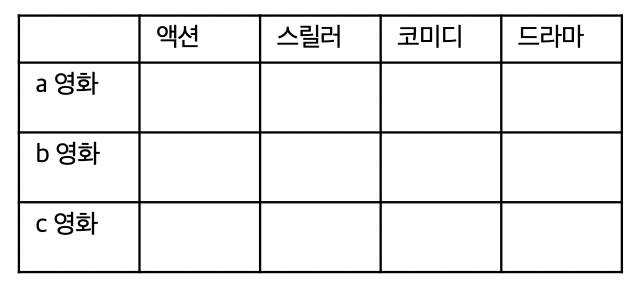

In [7]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
piv = user_movie.pivot_table(index = 'movieId', columns='genre', values='value')
piv

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
movie['corpus'] = movie['genres'].apply(lambda x : ' '.join(x.split('|')))

In [273]:
tfidv = TfidfVectorizer().fit(movie['corpus'])

In [278]:
temp = pd.DataFrame(tfidv.transform(movie['corpus']).toarray())

In [287]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [10]:
# 아이템 간 유사도 구하기
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
#코사인 유사도 처리를 위해 NaN -> 0
piv = piv.fillna(0)

In [12]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
CBF = pd.DataFrame(cosine_similarity(piv))

In [13]:
# movie - moive 아이템 간 유사도 데이터프레임
CBF.index = piv.index
CBF.columns = piv.index
CBF.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000


In [14]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
    similar_list = CBF.loc[movieId]
    merge_df = movie.merge(similar_list, on = 'movieId', how = 'left')
    top_10 = merge_df.sort_values(by = [movieId], ascending=False).iloc[1:11].drop(movieId,axis =1)
    input_movie = movie[movie['movieId'] == movieId]
    print("입력 영화:", input_movie.title.iloc[0])
    print("입력 영화 장르:", input_movie.genres.iloc[0],"\n")
    print("=====Most similar List=====")
    return top_10

In [15]:
getCBF(193583)

입력 영화: No Game No Life: Zero (2017)
입력 영화 장르: Animation|Comedy|Fantasy 

=====Most similar List=====


,movieId,title,genres
3098,4158,Monkeybone (2001),Animation|Comedy|Fantasy
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy
4558,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy
7368,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy
9665,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy
8999,139855,Anomalisa (2015),Animation|Comedy|Fantasy
4841,7228,Cool World (1992),Animation|Comedy|Fantasy
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy
4874,7304,Allegro non troppo (1977),Animation|Comedy|Fantasy|Musical


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

In [16]:
# User-Item 간 선호도 데이터프레임 만들기

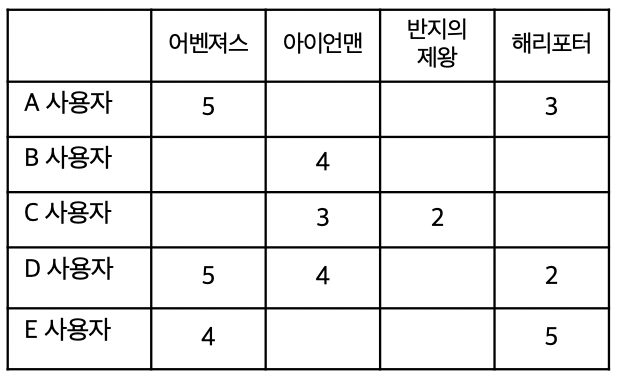

In [2]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [17]:
ratings = ratings.drop(['timestamp'], axis = 1)

In [18]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [19]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
piv = ratings.pivot_table(index = 'userId', columns='movieId', values= 'rating')
piv

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#코사인 유사도 처리를 위해 NaN -> 0
piv = piv.fillna(0)

In [21]:
# 사용자 간 유사도 구하기
CF = pd.DataFrame(cosine_similarity(piv))

In [22]:
# 사용자와 사용자의 유사도를 구할 때 꼭 코사인 유사도를 사용하지 않아도 됩니당
# 보완 코사인 유사도 혹은 피어슨 상관계수를 적용해보아유
CF.index = piv.index
CF.columns = piv.index
CF

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
6,0.128152,0.025333,0.003936,0.088491,0.300349,1.000000,0.075843,0.370488,0.013904,0.020385,...,0.021415,0.448927,0.098002,0.396582,0.104541,0.102123,0.162182,0.178809,0.214234,0.052668
7,0.158744,0.027585,0.000000,0.115120,0.108342,0.075843,1.000000,0.114885,0.099463,0.132099,...,0.206405,0.125182,0.103664,0.062025,0.219586,0.200035,0.186114,0.323541,0.090840,0.193219
8,0.136968,0.027257,0.004941,0.062969,0.429075,0.370488,0.114885,1.000000,0.000000,0.023914,...,0.080203,0.550552,0.101126,0.324495,0.120425,0.099388,0.185142,0.187233,0.423993,0.078153
9,0.064263,0.000000,0.000000,0.011361,0.000000,0.013904,0.099463,0.000000,1.000000,0.040959,...,0.081138,0.009257,0.044268,0.018969,0.096790,0.075898,0.011844,0.100435,0.000000,0.074399


In [23]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
    count_genre = user_movie.drop(['value'], axis = 1)
    user_movie_list = pd.DataFrame(ratings[ratings.userId == userId]['movieId'])
    count_genre = user_movie_list.merge(count_genre, on = 'movieId', how = 'left')
    count_genre = count_genre.genre.value_counts()
    plt.bar(x = count_genre.index, height=count_genre.values, width = 0.6)
    plt.title(f"{userId}'s favorite genres")
    plt.xticks(rotation = 90)
    plt.show()
    print("\n=====Recommendation List=====")
    
    similar = CF.loc[userId]
    max_value = 0
    for i in similar.index:
        if i == userId:
            continue
        else:
            temp = similar[i]
            if max_value < temp:
                max_value = temp
                max_idx = i
    
    compare_movie = ratings[ratings.userId == max_idx].sort_values(by = ['rating'], ascending = False)['movieId']
    input_movie = ratings[ratings.userId == userId]
    
    top_5 = []
    for i in compare_movie.values:
        if i not in input_movie.values:
            top_5.append(i)
    
        if len(top_5) == 5:
            break
            
    result_df = pd.DataFrame()
    for i in top_5:
        temp = movie[movie.movieId == i]
        result_df = pd.concat([result_df,temp])
    
    return result_df

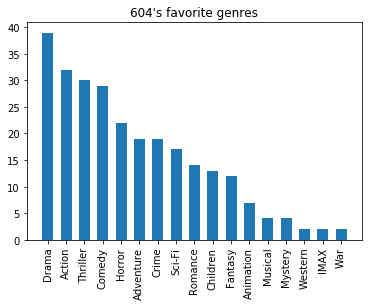


=====Recommendation List=====


,movieId,title,genres
398,457,"Fugitive, The (1993)",Thriller
291,333,Tommy Boy (1995),Comedy
278,319,Shallow Grave (1994),Comedy|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
242,280,Murder in the First (1995),Drama|Thriller


In [24]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [3]:
import MF

In [4]:
# 사용자-영화 선호도 데이터프레임입니당
piv = ratings.pivot_table(index = 'userId', columns='movieId', values= 'rating')
piv = piv.fillna(0)
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
piv = np.array(piv)

In [9]:
# MF.py를 참고하여 인자를 입력해 보아유
factorizer = MF.MatrixFactorization(piv, k=5, learning_rate=0.0001, reg_param=0.01, epochs=300, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0055
Iteration: 20 ; cost = 0.0047
Iteration: 30 ; cost = 0.0042
Iteration: 40 ; cost = 0.0039
Iteration: 50 ; cost = 0.0037
Iteration: 60 ; cost = 0.0036
Iteration: 70 ; cost = 0.0034
Iteration: 80 ; cost = 0.0033
Iteration: 90 ; cost = 0.0033
Iteration: 100 ; cost = 0.0032
Iteration: 110 ; cost = 0.0031
Iteration: 120 ; cost = 0.0031
Iteration: 130 ; cost = 0.0031
Iteration: 140 ; cost = 0.0030
Iteration: 150 ; cost = 0.0030
Iteration: 160 ; cost = 0.0030
Iteration: 170 ; cost = 0.0029
Iteration: 180 ; cost = 0.0029
Iteration: 190 ; cost = 0.0029
Iteration: 200 ; cost = 0.0029
Iteration: 210 ; cost = 0.0029
Iteration: 220 ; cost = 0.0028
Iteration: 230 ; cost = 0.0028
Iteration: 240 ; cost = 0.0028
Iteration: 250 ; cost = 0.0028
Iteration: 260 ; cost = 0.0028
Iteration: 270 ; cost = 0.0028
Iteration: 280 ; cost = 0.0028
Iteration: 290 ; cost = 0.0028
Iteration: 300 ; cost = 0.0028
User Latent P:
[[-1.87271933e-02 -6.97533967e-02  4.91114779e-02  2.31400158e-0

In [10]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.603658,4.287683,3.903258,3.886992,4.125511,4.726064,3.852299,4.213582,4.154367,4.187175,...,4.234671,4.144525,4.369960,4.321988,4.053983,4.295242,3.962015,4.264278,4.251056,4.250856
1,4.962448,4.657082,6.497737,5.086299,1.424774,2.469712,3.212469,1.159791,5.432152,4.349936,...,3.889846,2.705862,1.389943,3.565056,4.836493,1.931204,7.877872,3.358099,2.702414,2.237878
2,3.724202,3.952215,3.324833,1.446241,3.712910,2.917104,1.612859,3.850242,2.604743,3.105094,...,3.428120,1.030339,2.107004,3.669687,3.351744,4.927386,1.755483,5.006952,2.322373,2.339063
3,3.793424,3.448210,3.278684,2.941844,3.161152,3.815939,2.880062,3.425517,3.160859,3.383214,...,3.370960,3.258870,3.227731,3.222685,3.492067,3.638302,3.105923,3.645521,3.338557,3.382072
4,4.369827,4.584166,3.391578,4.279860,4.151197,3.096487,3.564950,2.665129,4.718744,3.557242,...,4.038186,2.157142,3.707227,5.847982,2.927575,3.185206,5.028815,3.395200,3.011556,2.535754
5,3.949960,3.612474,3.315075,3.311307,3.364924,3.920243,3.151041,3.419441,3.529751,3.492614,...,3.594340,3.426096,3.584728,3.590080,3.530715,3.618346,3.507522,3.546496,3.519841,3.462635
6,3.503524,3.182304,3.045376,2.492781,2.835561,3.721393,2.590036,3.228703,2.886247,3.184229,...,3.018254,3.033612,3.009068,2.919525,2.976375,3.219687,2.591124,3.406840,3.122531,3.257197
7,3.610210,3.186674,3.561596,3.216120,1.267278,3.067040,1.814634,0.752794,7.361812,2.821060,...,4.818621,2.287804,5.341929,3.023480,1.780218,0.855768,5.288214,-0.073507,3.557329,1.684473
8,3.371431,3.074461,2.810640,2.652685,2.397215,3.277865,2.204196,2.225370,4.410892,2.806866,...,3.613245,2.477965,3.924131,3.125605,2.281126,2.338972,3.363463,1.943418,3.120256,2.446275
9,3.682507,3.442448,3.166802,2.821175,2.993140,3.420362,2.568362,2.974347,3.552610,3.162155,...,3.462005,2.673840,3.245498,3.376648,3.118979,3.315048,3.254551,3.228516,3.081023,2.861526


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

 ## collaborative filtering(item-based)
 - 위의 예시인 user-based가 아닌 item-based를 사용해봤습니다.

In [25]:
# 해당 데이터프레임은 영화-사용자 선호도 데이터프레임
piv = ratings.pivot_table(index = 'movieId', columns='userId', values= 'rating')
piv_copy = piv.copy() #밑의 nan이 포함된 연산을 위해 copy
piv

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
piv = piv.fillna(0)

In [27]:
CF = pd.DataFrame(cosine_similarity(piv))

In [28]:
CF.index = piv.index
CF.columns = piv.index
CF.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def getCF_movie(userId):
    temp_piv = piv_copy[userId] #pandas series로 따로 분리해서 연산 진행 
    average = temp_piv.mean() #평점 예측을 위한 평균

    rated_idx = [] #rating값이 있는 영화의 인덱스
    rated = [] #해당 인덱스들의 값

    #for문을 통해 인덱스와 해당 값들을 append
    for i in temp_piv.index:
        temp = temp_piv.loc[i]
        if not pd.isna(temp):
            rated_idx.append(i)
            rated.append(temp)

    rated = np.array(rated) #내적을 위해 넘파이 배열로 변환

    #수업 pdf에 나온 사용자의 아이템 기반 평점 예측 수식 구현
    for i in temp_piv.index:
        if pd.isna(temp_piv.loc[i]):
            CF_list = []
            #CF의 i,j의 값을 갖고와서 코사인 유사도를 담은 list 만들기 
            for j in rated_idx: 
                CF_list.append(CF.loc[i].loc[j])
            CF_list = np.array(CF_list) #내적을 위해 넘파이 배열로 변환

            if CF_list.sum() == 0: #평가된 영화들과 평점을 예상할 영화의 유사도가 모두 0이면
                continue           #수식에서 분모 부분이 0이 되서 문제가 생긴다
                                   #이를 방지하기 위해 해당 조건문 이용
            result = average + ((rated.dot(CF_list))/CF_list.sum()) #수식 구현
            temp_piv.loc[i] = result #예측된 평점 할당

    #밑의 sort를 위해 해당 유저가 시청한 영화의 rating을 nan으로 바꾸기
    for i in rated_idx:
        temp_piv.loc[i] = np.nan

    #상위10개의 movieId 
    top10 = temp_piv.sort_values(ascending = False).head(10).index

    result_df = pd.DataFrame()
    
    for i in top10:
        temp = movie[movie.movieId == i]
        result_df = pd.concat([result_df, temp])
    print("=========recommend movie top10=========")

    return result_df

In [33]:
getCF_movie(5)

=========recommend movie top10=========


,movieId,title,genres
4192,6044,Blind Date (1984),Horror|Thriller
4145,5962,Body of Evidence (1993),Drama|Thriller
251,290,Once Were Warriors (1994),Crime|Drama
413,475,In the Name of the Father (1993),Drama
198,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance
211,247,Heavenly Creatures (1994),Crime|Drama
2348,3106,Come See the Paradise (1990),Drama|Romance
7684,89386,Pearl Jam Twenty (2011),Documentary|Musical
1659,2226,"Ring, The (1927)",Drama
